<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW10_lKelley/DSPS_HW10_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
import scipy
from sklearn import cluster
from scipy import spatial
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")

In [3]:
genes = genes.drop(columns = ['Unnamed: 0'])
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [9]:
genes.shape

(4224, 74)

In [4]:
print('The means of the first and last few rows:\n',
      genes.mean(),"\n\n and the distribution of the means is\n{:0.4f}±{:0.4f}"
      .format(genes.mean().mean(),
                                                  genes.mean().std()),
      '\n\n---\n\n The standard deviations of the first/last few are:\n',
      genes.std(), "\n\n and the distribution of the standard deviations is\n\
      {:0.4f}±{:0.4f}".format(genes.std().mean(), genes.std().std()))

The means of the first and last few rows:
 1    -0.094115
2    -0.027780
3    -0.001672
4    -0.110167
5    -0.047817
        ...   
83   -0.051150
84    0.004469
85   -0.001898
86   -0.143864
87   -0.002374
Length: 74, dtype: float64 

 and the distribution of the means is
-0.0396±0.0392 

---

 The standard deviations of the first/last few are:
 1     0.502677
2     0.340808
3     0.328042
4     0.692851
5     0.434918
        ...   
83    0.401593
84    0.479766
85    0.487669
86    0.532901
87    0.346003
Length: 74, dtype: float64 

 and the distribution of the standard deviations is
      0.4418±0.0779


# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [0]:
scaledgenes = skl.preprocessing.scale(genes)

In [6]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

In [0]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
twodproj = skl.manifold.TSNE(n_components=2, random_state=0)
twodproj1 = twodproj.fit_transform(scaledgenes)

In [13]:
twodproj1.shape

(4224, 2)

In [0]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


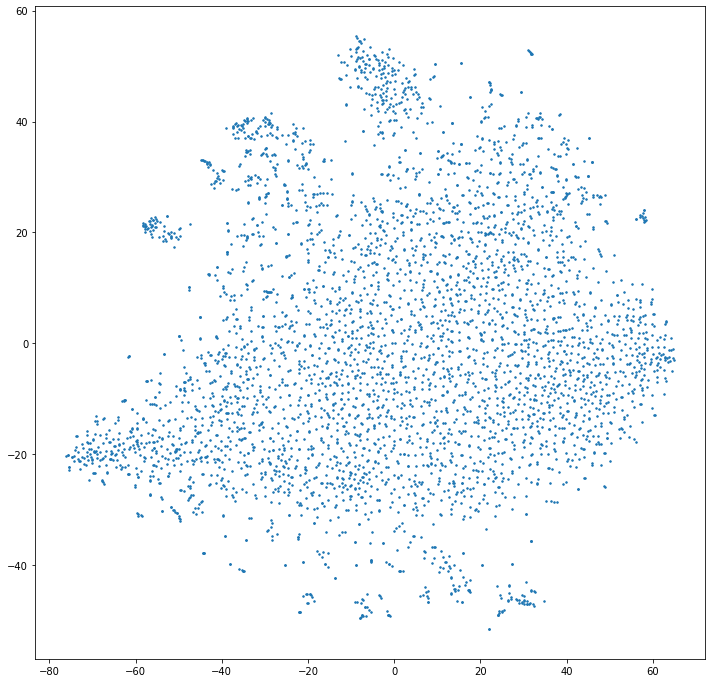

In [8]:
pl.figure(figsize = (12,12))
pl.plot(twodproj1[:,0], twodproj1[:,1], '.', markersize=3);

**Figure 1:** Projection of the many-dimensional space onto the two-optimal dimensions of the space based on TSNE.

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

312576.00000000006
251076.64173410618
231187.35509465548
232198.96250402514
232460.50291624625
227412.0924868392
226732.10627430063
222927.47862976193
222715.9871042717
221829.4991090807


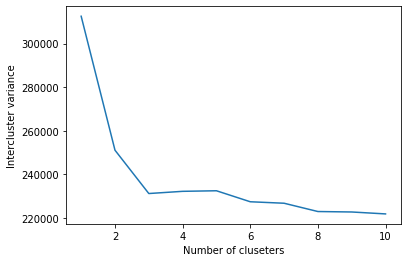

In [10]:
tv = []
for i in range(1, 11):
    km = skl.cluster.k_means(scaledgenes, i)
    tv.append(calICVar(scaledgenes, km[1]))
    
pl.plot(range(1,11), tv)
pl.ylabel("Intercluster variance")
pl.xlabel("Number of cluseters");

**Figure 2:** A comparison of the ICV for the number of clusters varying from 1 to 10. From visual analysis of this plot, the optimal number of clusters is 3 as shown by the 'elbow' in the figure above.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

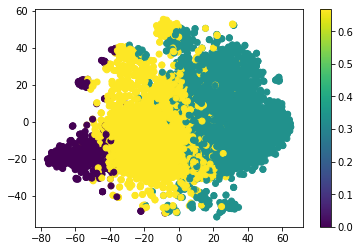

In [11]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();


**Figure 3:** Clustering of the three groups onto the 2-D projection of the data space. The figure shows which of the three clusters each of the points belong to. 

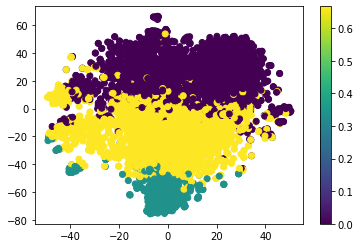

In [0]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();


# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

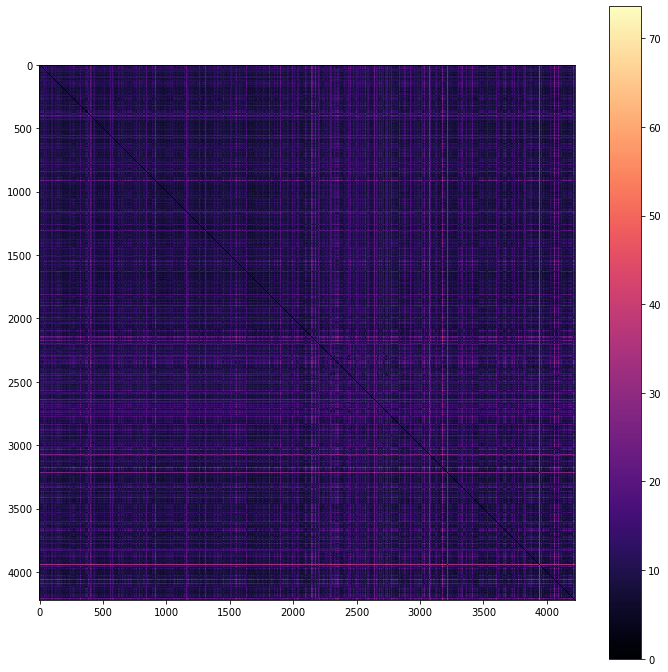

In [14]:
distance_mat = spatial.distance.pdist(scaledgenes,
                                         metric = 'euclidean')

pl.figure(figsize = (12,12))

pl.imshow(spatial.distance.squareform(distance_mat), cmap='magma')

pl.colorbar()

**Figure 4:** Distance matrix of the points of this data set. Notice the diagonal of the matrix is 0. This matrix's structure could be characterized as grid-like. The matrix is not organized by its structure though, due to the way we had handled the data thus fair.

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

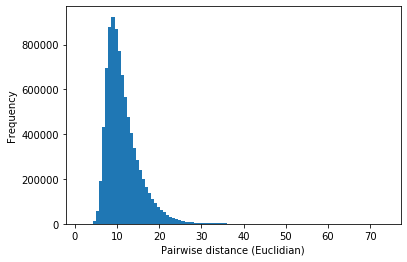

In [50]:
pl.hist(distance_mat, bins = 100);
pl.xlabel('Pairwise distance (Euclidian)')
pl.ylabel('Frequency');

In [60]:
distance_mat.mean()

11.470978212545768

**Figure 5:** Histogram of the closest distances for each data point and the frequency at which they occur.

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [25]:
#11.7 was chosen as the epsilon value because it is near the mean of 11.47
dbs = skl.cluster.DBSCAN(eps=11.7, min_samples=265)
dbs.fit(twodproj1)

DBSCAN(algorithm='auto', eps=11.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=265, n_jobs=None, p=None)

In [26]:
set(dbs.labels_)

{-1, 0, 1, 2}

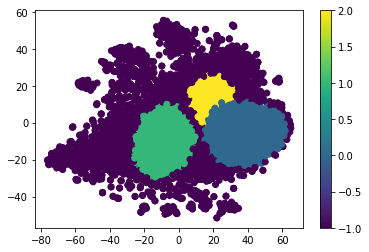

In [27]:
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=dbs.labels_)
pl.colorbar();

**Figure 6:** Colormap of the clusters on the 2D projection of the data set, based on which group each of the data points belongs to. 3 groups were again obtained, much with a larger amount of noise this time around.

In [28]:
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_clusters_, n_noise_

(3, 2521)

The above shows that we have 3 clusters, which was the amount obtained earlier in this assignment with the other method. However, the amount of noise points is much larger than previously determined, constituting around half of the data set. This disparity shows how finely-tuned the hyperparameters of the DBSCAN need to be to obtain similar results to other methods. Thus, it is very hard to obtain definitive conclusions from this method of clustering because of how certain one needs to be about the hyperparameters of the dataset before they perform the machine learning.

In [0]:
skl.cluster.DBSCAN?

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
scipy.cluster.hierarchy.set_link_color_palette(['C0','C1','C2','C3','C4','C5'])

In [0]:
links_gene = linkage(scaledgenes, method='ward')

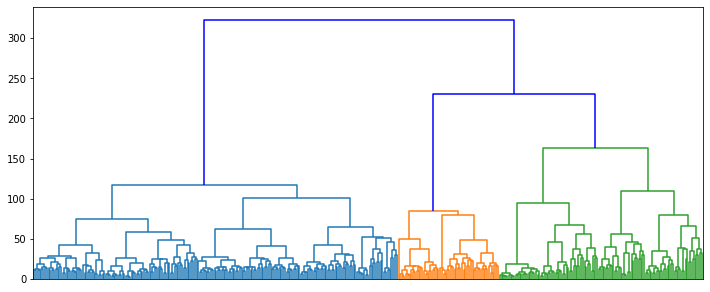

In [37]:
pl.figure(figsize=(12,5))
dendrogram(links_gene, p=8, truncate_mode='level', no_labels=True);

**Figure 7:** Dendrogram for the data done by agglomerative clustering using ward linkage. This method returns three total clusters, as seen by the three colored groups above.

4b.3 repeat with a different linkage and comment on differences

In [0]:
links_gene_2 = linkage(scaledgenes, method = 'complete')

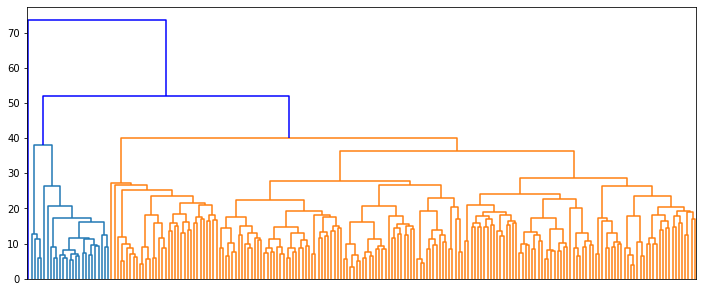

In [40]:
pl.figure(figsize=(12,5))
dendrogram(links_gene_2, p=10, truncate_mode='level', no_labels=True);

**Figure 8:** Dendrogram for the data done by agglomerative clustering using complete linkage. This method returns only two total clusters, different from the ward linkage trial run before. Again, this illustrate how clustering methods are very susceptible to the hyperparameters than you choose for each trial.

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

312576.00000000006
265786.21130934544
240649.59622656365
240557.2366028278
239961.49171955144
235074.38528557075
234083.16084309437
232028.39531397203
228615.8484280025
228470.48992579285


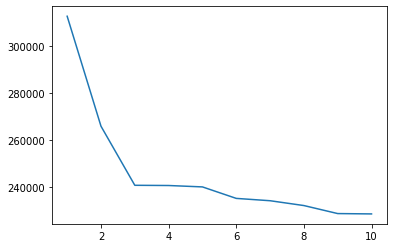

In [42]:
tv_ag = []

np.random.seed(180135)

for i in range(1, 11):
    agger = skl.cluster.AgglomerativeClustering(n_clusters = i).fit(
        scaledgenes)
    km = agger.labels_
    tv_ag.append(calICVar(scaledgenes, agger.labels_))

pl.plot(range(1,11), tv_ag)

**Figure 9:** Elbow plot of the different number of clusters for the agglomerative clustering method. Again, the optimal number of clusters is 3, shown by the bend in the curve

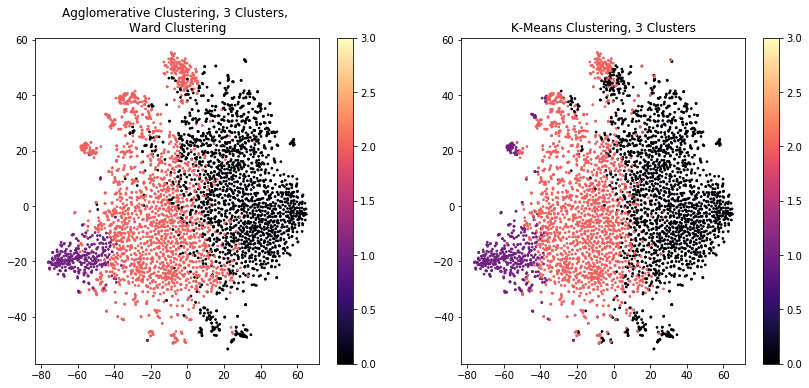

In [45]:
genes_agcluster = skl.cluster.AgglomerativeClustering(n_clusters=3).fit(
    scaledgenes)

pl.figure(figsize=(14,6))
pl.subplot(121)
sizee = 3
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=(genes_agcluster.labels_+2)%3,
           s=sizee, cmap='magma', vmax = 3)
pl.title('Agglomerative Clustering, 3 Clusters, \nWard Clustering')
pl.colorbar()
pl.subplot(122)
pl.scatter(twodproj1[:,0], twodproj1[:,1], c=(skl.cluster.KMeans(n_clusters = 3,
                                   random_state=174021).fit(scaledgenes).labels_), s=sizee,
           cmap='magma', vmax = 3)
pl.title('K-Means Clustering, 3 Clusters')
pl.colorbar();

**Figure 10:** Comparison of the agglomerative clustering using the ward method with the k-means clustering. These methods have both generally made the same groups with small differences between them.

In [0]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

<span style="color:red">**+10 pts: EC**</span>

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
